

# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information about 100,000 movie,This dataset is gatherd from TMDb(The movie Database) 
This dataset contais many columns like:
- popularity
- average vote
- gener
- cast
- etc.....


### Question(s) for Analysis
- top 10 movies in terms of popularity
- top 10 movies in terms of revenue
- top 20 movies in terms of rating
- who is the most participating actor?
- what is the most popular gener from year to another?
- correlation between revenue and other features
- which year has most number of films produced?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


#### load dataset and have a look at its first rows

In [3]:
df=pd.read_csv("Database_TMDb_movie_data//tmdb-movies.csv")

In [4]:
print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [5]:
df.shape

(10866, 21)

#### total rows= 10866
#### total columns =21

### display info about data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### it is clear that data has many null values in cols like id,cast,homepage,director,tagline,etc...

In [7]:
print(df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

### some info from this summary stats:
#### average rates is 5.97
#### max budget spent was 425 milion dollar
#### max revenu was 2.78 bilion dollar


### Data Cleaning

 

#### first i will drop unnecessary columns with many null values like homepage,tagline,proudction company etc.... from my dataset

In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
df.drop(['id','homepage','tagline','keywords','overview','imdb_id','production_companies'],axis=1,inplace=True)

In [10]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [11]:
print(df.head())

   popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller       6/9/

#### check for null values

In [12]:
print(df.isnull().sum())

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64


#### rename vote_average to 'rating'

In [13]:
df.rename(columns={'vote_average':'rating'},inplace=True)

In [14]:
print(df.head(5))

   popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller       6/9/

#### extract actor name from cast column

In [15]:
df.cast=df.cast.apply(lambda x:str(x))

In [16]:
df.cast=df.cast.apply(lambda x:x.split('|')[0])

In [17]:
df.rename(columns={'cast':'actor'},inplace=True)

In [18]:
print(df.head())

   popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

              actor          director  runtime  \
0       Chris Pratt   Colin Trevorrow      124   
1         Tom Hardy     George Miller      120   
2  Shailene Woodley  Robert Schwentke      119   
3     Harrison Ford       J.J. Abrams      136   
4        Vin Diesel         James Wan      137   

                                      genres release_date  vote_count  rating  \
0  Action|Adventure|Science Fiction|Thriller       6/9/15        5562     6.5   
1  Action|Adventure|Science Fiction|Thriller      5/13/15        6185     7.1   
2         Adventure|Science Fiction

In [19]:
df.duplicated(subset=['original_title','release_year']).sum()

4

#### so there is 4 films with same name and same release year so it is duplicated

#### so we will drop them

In [20]:
df.drop_duplicates(subset=['original_title','release_year'],inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



### Top 10 movies in terms of popularity

In [21]:
top_10=df.sort_values(['popularity'],ascending=False)[:10]

Text(0.5,1,'Top 10 movie in popularity')

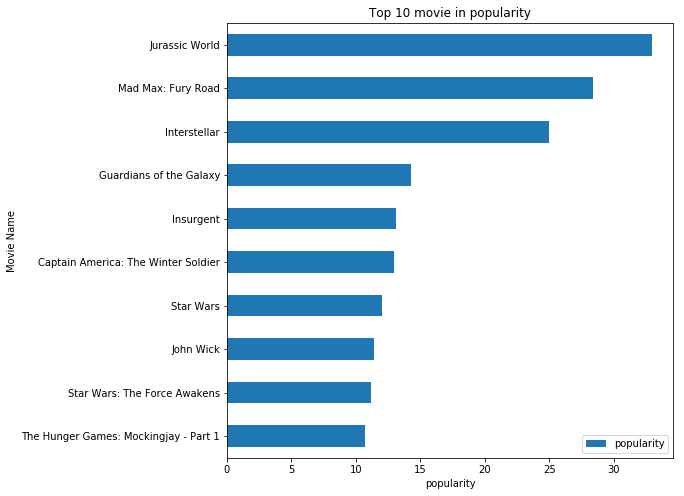

In [22]:
top_10[::-1].plot(kind='barh',x='original_title',y='popularity',figsize=(8,8))
plt.ylabel("Movie Name")
plt.xlabel("popularity")
plt.title("Top 10 movie in popularity")

### Top 10 movies in terms of revenue

In [23]:
top_10_rev=df.sort_values(['revenue'],ascending=False)[:10]

Text(0.5,1,'Top 10 movie in revenue')

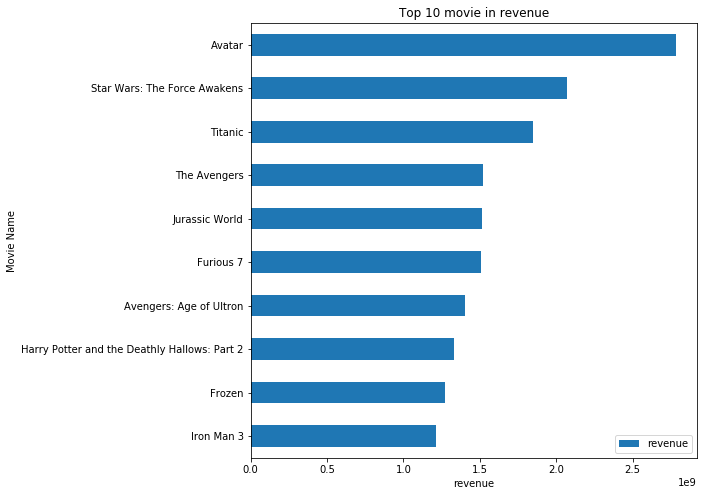

In [24]:
top_10_rev[::-1].plot(kind='barh',x='original_title',y='revenue',figsize=(8,8))
plt.ylabel("Movie Name")
plt.xlabel("revenue")
plt.title("Top 10 movie in revenue")

### Top Rated Movies

In [25]:
top_rated=df.sort_values(['rating'],ascending=False)[:20]

Text(0.5,1,'Top Rated Movies')

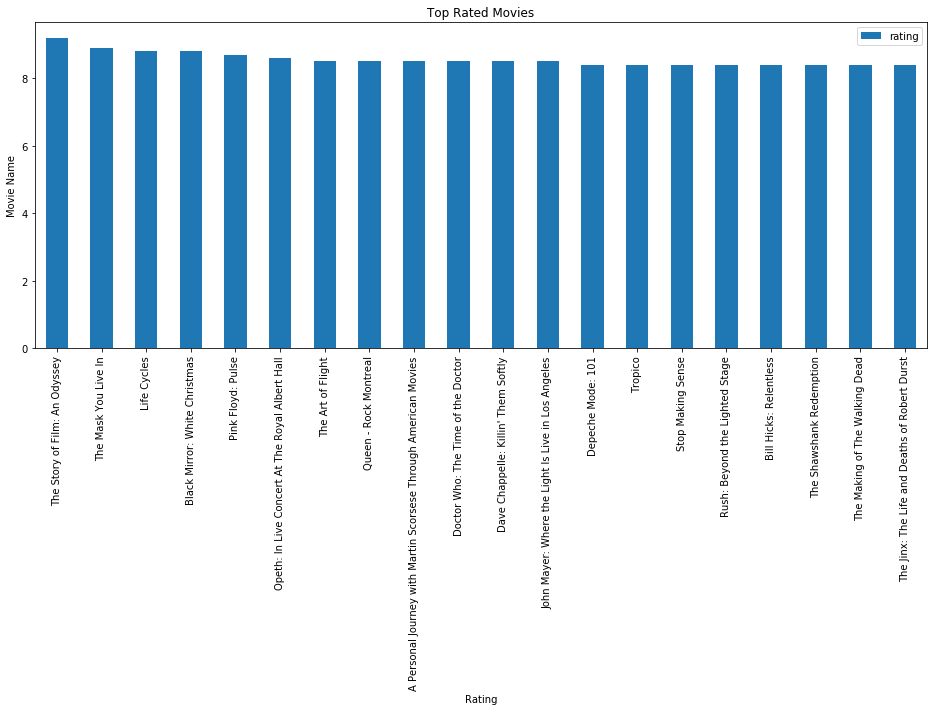

In [26]:
top_rated.plot(kind='bar',x='original_title',y='rating',figsize=(16,6))
#plt.bar(top_rated['original_title'],top_rated['rating'],figsize=(16,6))
plt.ylabel("Movie Name")
plt.xlabel("Rating")
plt.title("Top Rated Movies")

### Most participating actor

In [27]:
df['actor'].value_counts()[1:11]

Nicolas Cage             50
Robert De Niro           42
Bruce Willis             39
Clint Eastwood           38
Johnny Depp              37
Sylvester Stallone       37
Tom Hanks                37
Steven Seagal            35
Jean-Claude Van Damme    35
Robin Williams           33
Name: actor, dtype: int64

Text(0.5,1,'Most participated actors')

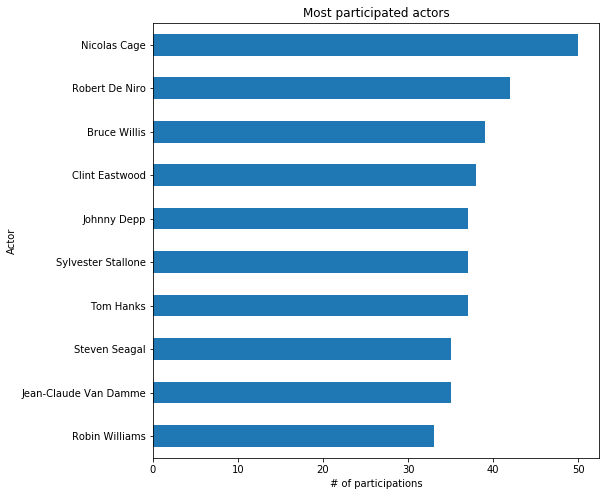

In [28]:
df['actor'].value_counts()[1:11][::-1].plot(kind='barh',figsize=(8,8))
plt.ylabel("Actor")
plt.xlabel("# of participations")
plt.title("Most participated actors")

### which year has most number of films produced?

Text(0.5,1,'most producing year')

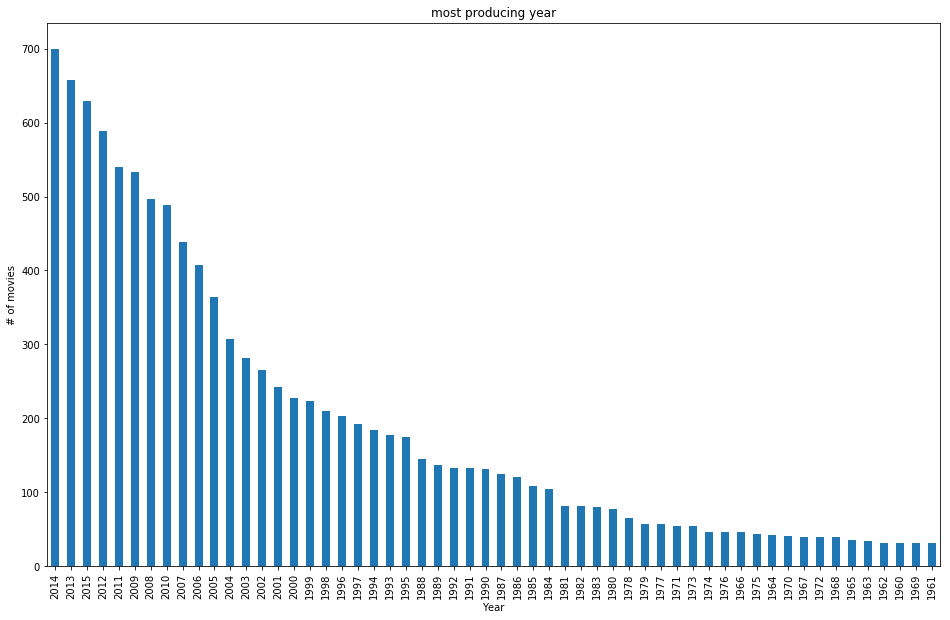

In [29]:
df['release_year'].value_counts().plot(kind='bar',figsize=(16,10))
plt.xlabel("Year")
plt.ylabel("# of movies")
plt.title("most producing year")


#### it is clear that,2014 was most year with movies produced

### correlation between different features

In [30]:
print(df.corr())

              popularity    budget   revenue   runtime  vote_count    rating  \
popularity      1.000000  0.545580  0.663368  0.139105    0.800830  0.209543   
budget          0.545580  1.000000  0.734965  0.191142    0.632774  0.081052   
revenue         0.663368  0.734965  1.000000  0.162815    0.791173  0.172543   
runtime         0.139105  0.191142  0.162815  1.000000    0.163293  0.156792   
vote_count      0.800830  0.632774  0.791173  0.163293    1.000000  0.253833   
rating          0.209543  0.081052  0.172543  0.156792    0.253833  1.000000   
release_year    0.089813  0.115969  0.057093 -0.117155    0.107979 -0.117482   
budget_adj      0.513684  0.968959  0.706505  0.220944    0.587139  0.093066   
revenue_adj     0.609092  0.622550  0.919107  0.175652    0.707937  0.193065   

              release_year  budget_adj  revenue_adj  
popularity        0.089813    0.513684     0.609092  
budget            0.115969    0.968959     0.622550  
revenue           0.057093    0.70650

Text(0.5,1,'Relation between budget and revenue')

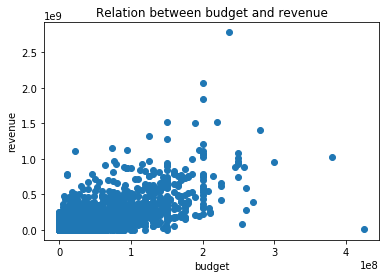

In [31]:
plt.scatter(df['budget'],df['revenue'])
plt.xlabel("budget")
plt.ylabel("revenue")
plt.title("Relation between budget and revenue")

#### I think there is some positive relation between budget and revenue 

Text(0.5,1,'Relation between runtim and revenue')

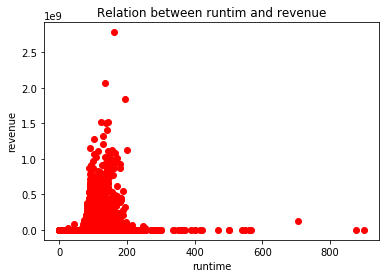

In [32]:
plt.scatter(df['runtime'],df['revenue'],color='r')
plt.xlabel("runtime")
plt.ylabel("revenue")
plt.title("Relation between runtim and revenue")

#### it is clear that no relation between film period and revenue

Text(0.5,1,'Relation between film rating and revenue')

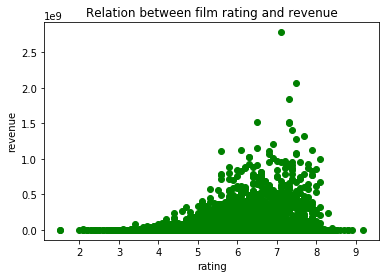

In [33]:
plt.scatter(df['rating'],df['revenue'],color='g')
plt.xlabel("rating")
plt.ylabel("revenue")
plt.title("Relation between film rating and revenue")

#### I see many films with high rating and low revenue so ther are idependent of each other

Text(0.5,1,'Relation between film rating and budget')

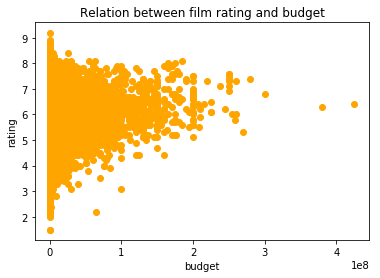

In [34]:
plt.scatter(df['budget'],df['rating'],color='orange')
plt.xlabel("budget")
plt.ylabel("rating")
plt.title("Relation between film rating and budget")

#### the same thing about budget,it is not necessary to spend more money to get high rating

[Text(0,0.5,'revenue'),
 Text(0.5,0,'popularity'),
 Text(0.5,1,'popularity vs revenue')]

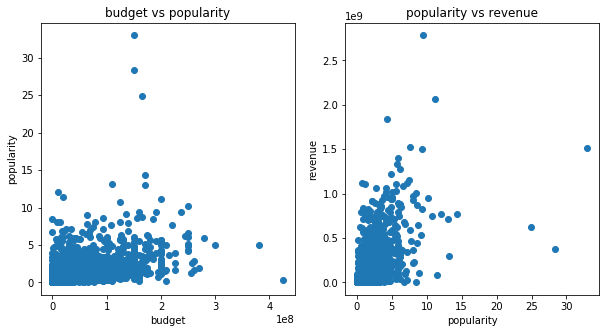

In [35]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.scatter(df['budget'],df['popularity'])
ax1.set(xlabel='budget',ylabel='popularity',title='budget vs popularity')
ax2.scatter(df['popularity'],df['revenue'])
ax2.set(xlabel='popularity',ylabel='revenue',title='popularity vs revenue')

#### budget dose not affect much on how film will be populary
#### sometime popular films gain much revenue as shown

### what is the most popular gener from year to another?

In [36]:
unique_years=df['release_year'].unique()
unique_years.sort()

In [37]:
df_clean=df.dropna()

In [38]:
df_clean['genres']=df_clean['genres'].apply(lambda x:x.split('|'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
def popular_genre_in_year(year):
    genres_per_year=dict()
    df_per_year=df_clean[df_clean['release_year']==year]
    for gen_list in df_per_year['genres']:
        for x in gen_list:
            if x in genres_per_year:
                    genres_per_year[x]+=1
            else:
                genres_per_year[x]=1
    return max(genres_per_year,key=genres_per_year.get)

In [40]:
genres_dict=dict()
for x in unique_years:
    genres_dict[x]=popular_genre_in_year(x)

In [41]:
genres_dict

{1960: 'Drama',
 1961: 'Drama',
 1962: 'Drama',
 1963: 'Comedy',
 1964: 'Drama',
 1965: 'Drama',
 1966: 'Comedy',
 1967: 'Comedy',
 1968: 'Drama',
 1969: 'Drama',
 1970: 'Drama',
 1971: 'Drama',
 1972: 'Drama',
 1973: 'Drama',
 1974: 'Drama',
 1975: 'Drama',
 1976: 'Drama',
 1977: 'Drama',
 1978: 'Drama',
 1979: 'Drama',
 1980: 'Drama',
 1981: 'Drama',
 1982: 'Drama',
 1983: 'Drama',
 1984: 'Drama',
 1985: 'Comedy',
 1986: 'Drama',
 1987: 'Comedy',
 1988: 'Comedy',
 1989: 'Comedy',
 1990: 'Drama',
 1991: 'Drama',
 1992: 'Drama',
 1993: 'Drama',
 1994: 'Comedy',
 1995: 'Drama',
 1996: 'Drama',
 1997: 'Drama',
 1998: 'Drama',
 1999: 'Drama',
 2000: 'Drama',
 2001: 'Comedy',
 2002: 'Drama',
 2003: 'Comedy',
 2004: 'Drama',
 2005: 'Drama',
 2006: 'Drama',
 2007: 'Drama',
 2008: 'Drama',
 2009: 'Drama',
 2010: 'Drama',
 2011: 'Drama',
 2012: 'Drama',
 2013: 'Drama',
 2014: 'Drama',
 2015: 'Drama'}

### how movie industry changed over years

[Text(0,0.5,'Revenue'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'Release yeae vs revenue')]

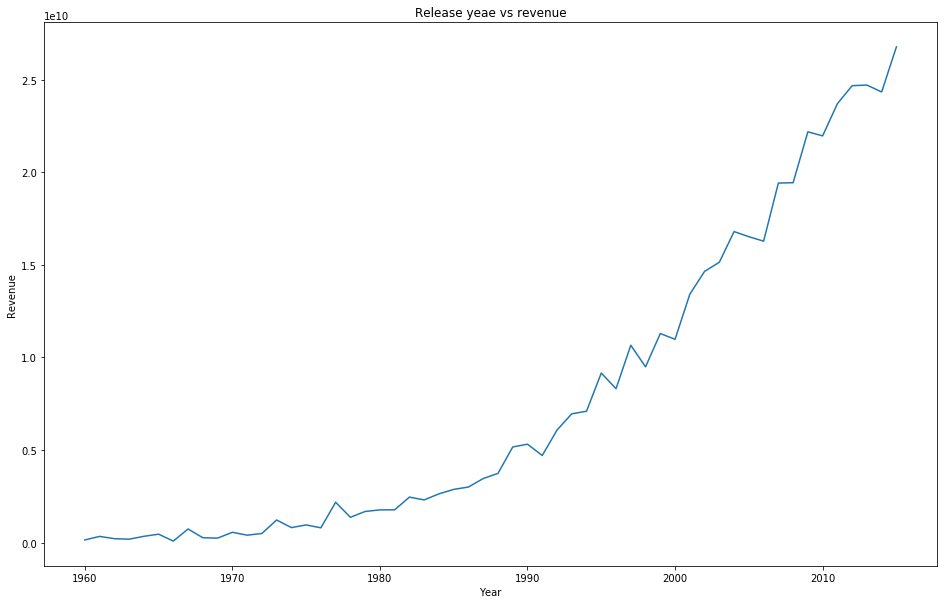

In [42]:
fig,ax=plt.subplots(figsize=(16,10))
ax.plot(df.groupby('release_year')['revenue'].sum())
ax.set(xlabel='Year',ylabel='Revenue',title='Release yeae vs revenue')

#### no doubt that , movie idustry has grown up over years

### most common genere 

In [43]:
df_new=df.dropna(subset=['genres'])

In [44]:
genres=dict()
for genre_list in df_new.loc[:,'genres']:
    for x in genre_list.split('|'):
        if x in genres:
            genres[x]+=1
        else:
            genres[x]=1
genres    

{'Action': 2383,
 'Adventure': 1470,
 'Science Fiction': 1228,
 'Thriller': 2906,
 'Fantasy': 916,
 'Crime': 1354,
 'Western': 165,
 'Drama': 4758,
 'Family': 1231,
 'Animation': 699,
 'Comedy': 3792,
 'Mystery': 810,
 'Romance': 1711,
 'War': 269,
 'History': 333,
 'Music': 408,
 'Horror': 1637,
 'Documentary': 520,
 'TV Movie': 166,
 'Foreign': 188}

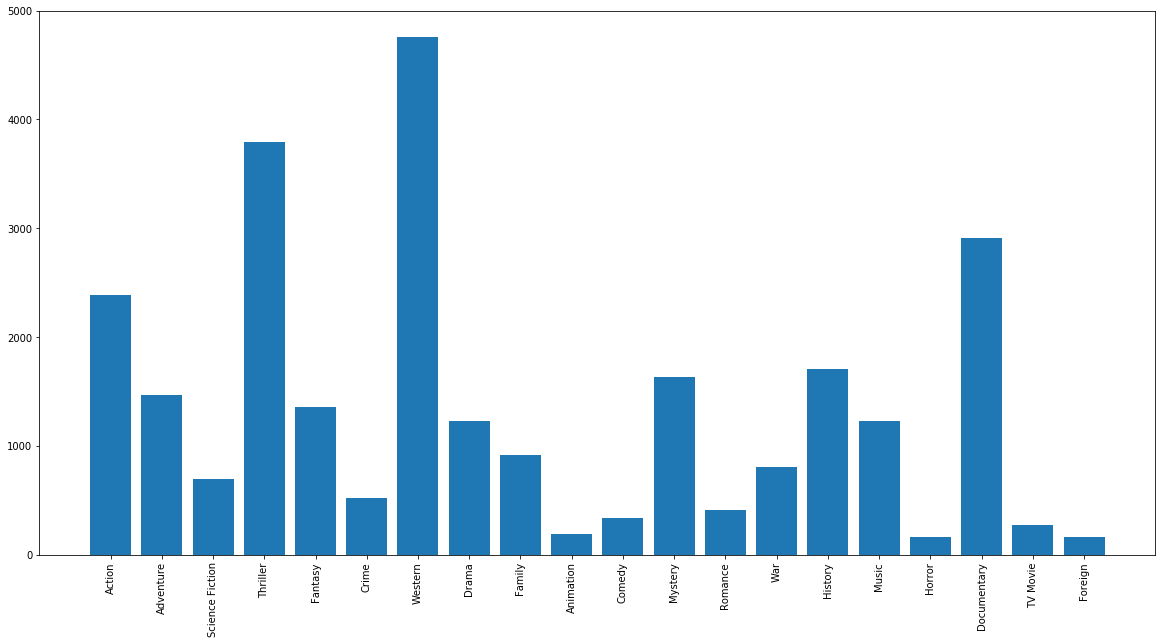

In [45]:
fig,ax=plt.subplots(figsize=(20,10))
ax.bar(genres.keys(),genres.values())
ax.set_xticklabels(genres.keys(),rotation=90)
plt.show()

<a id='conclusions'></a>
## Conclusions
- most popular movie => jurassic world
- most revenued movie => Avatar
- 2014 was top year in number of films produced
- some positive correlation between
 - revenue and budget
 - popularity and revenue
 - revenue and vote count
- movies industry has grown over years
- most popular genres were (action,thriller,western)
- nicolas cage was the actor with most apperance

### Limitations


- huge number of zeros in budget and revenue
- many nan values in cast columns 


## Submit The Project 


In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0